In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
car_acc = pd.read_csv('/content/road-accidents.csv', comment ='#', sep='|')
car_acc.head(5)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [3]:
n= car_acc.shape
print('There are {} rows and {} columns.\n'.format(n[0], n[1]))

There are 51 rows and 5 columns.



In [4]:
info1= car_acc.info()
print(info1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


In [5]:
car_acc.tail()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


In [6]:
car_acc.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


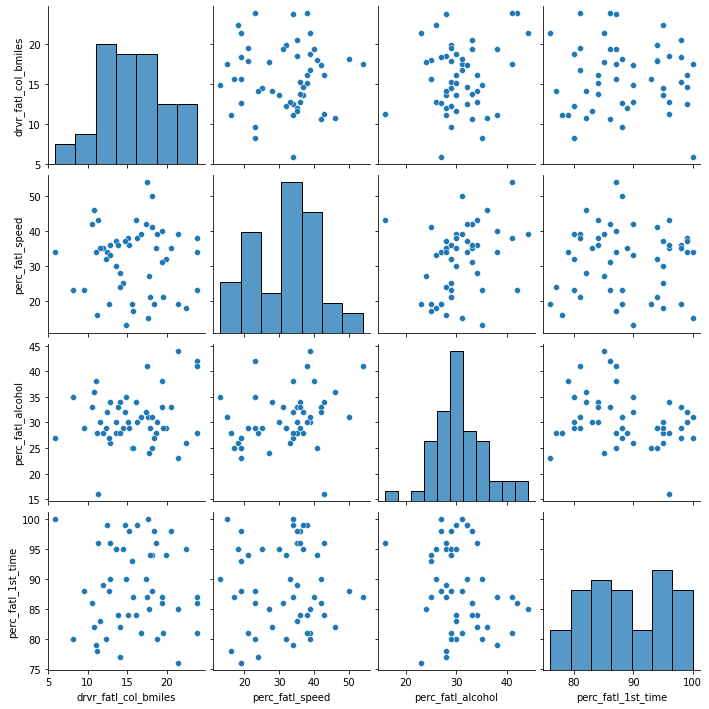

In [7]:
# Create a pairwise scatter plot to explore the data
sns.pairplot(car_acc)

The Pearson correlation coefficient 

In [8]:
corr1 = car_acc.corr()
corr1

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [9]:
features = car_acc.drop(['state', 'drvr_fatl_col_bmiles'], axis=1)
target = car_acc.drvr_fatl_col_bmiles.copy()

In [10]:
reg1 = linear_model.LinearRegression()
reg1.fit(features, target)
coef = reg1.coef_
coef

array([-0.04180041,  0.19086404,  0.02473301])

In [11]:
# Standardize and center the feature columns
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [12]:
pca = PCA()

pca.fit(features_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The cumulative variance of the first two principal components is 0.7947


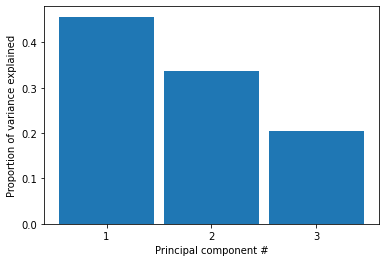

In [13]:
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_,width=0.9,align='center')
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_[0].cumsum()[0] + pca.explained_variance_ratio_[1].cumsum()[0]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

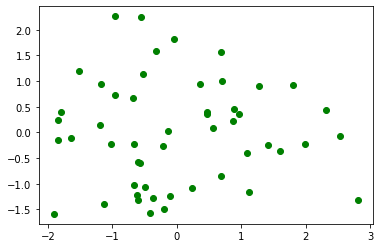

In [14]:
# Transform the scaled features using two principal components
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2,color='green')

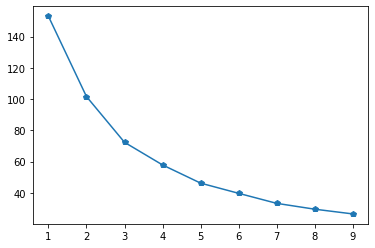

In [15]:
# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias , marker='p')

## 9. KMeans to visualize clusters in the PCA scatter plot
<p>Since there wasn't a clear elbow in the scree plot, assigning the states to either two or three clusters is a reasonable choice, and we will resume our analysis using three clusters. Let's see how the PCA scatter plot looks if we color the states according to the cluster to which they are assigned.</p>

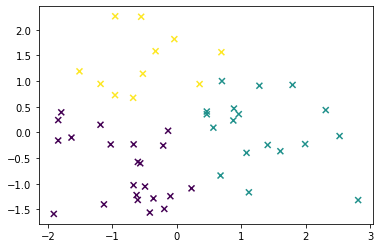

In [16]:
km = KMeans(n_clusters=3, random_state=50)
km.fit(features_scaled)

plt.scatter(p_comp1, p_comp2, c=km.labels_,marker='x')

The feature differences between the clusters

In [17]:
# Create a new column with the labels from the KMeans clustering
car_acc['cluster'] = km.labels_

display(car_acc.head())

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster
0,Alabama,18.8,39,30,80,1
1,Alaska,18.1,41,25,94,0
2,Arizona,18.6,35,28,96,0
3,Arkansas,22.4,18,26,95,0
4,California,12.0,35,28,89,0


In [18]:
# Reshape the DataFrame to the long format
melt_car = pd.melt(car_acc, id_vars=['cluster'],
                  var_name='measurement', value_name='percent',
                  value_vars=['perc_fatl_speed', 'perc_fatl_alcohol','perc_fatl_1st_time'])

display(melt_car.head())

,cluster,measurement,percent
0,1,perc_fatl_speed,39
1,0,perc_fatl_speed,41
2,0,perc_fatl_speed,35
3,0,perc_fatl_speed,18
4,0,perc_fatl_speed,35


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


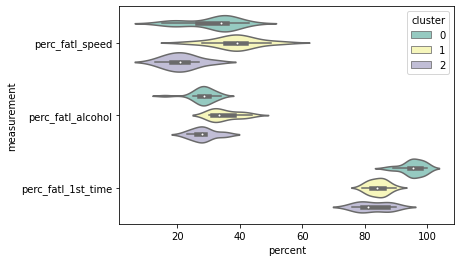

In [29]:
#violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(melt_car['percent'], melt_car['measurement'], hue=melt_car['cluster'],palette="Set3",gridsize=100, width=0.8)

The number of accidents within each cluster:

In [20]:
# Read in the new dataset
miles_driven = pd.read_csv('/content/miles-driven.csv', sep='|')

miles_driven.head(5)

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [21]:
# Merge the `car_acc` DataFrame with the `miles_driven` DataFrame
car_acc_miles = car_acc.merge(miles_driven, on='state')

# Create a new column for the number of drivers involved in fatal accidents
car_acc_miles['num_drvr_fatl_col'] = (car_acc_miles['drvr_fatl_col_bmiles'] * car_acc_miles['million_miles_annually']) / 1000

display(car_acc_miles.head())

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,num_drvr_fatl_col
0,Alabama,18.8,39,30,80,1,64914,1220.3832
1,Alaska,18.1,41,25,94,0,4593,83.1333
2,Arizona,18.6,35,28,96,0,59575,1108.0950
3,Arkansas,22.4,18,26,95,0,32953,738.1472
4,California,12.0,35,28,89,0,320784,3849.4080


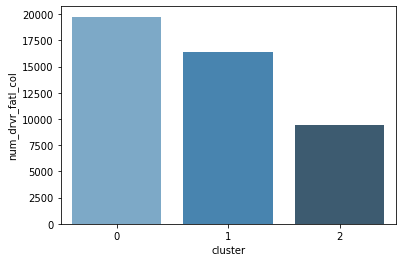

In [22]:
# barplot of the total number of accidents per cluster
sns.barplot(x='cluster', y='num_drvr_fatl_col', data=car_acc_miles, estimator=sum, ci=None,linewidth=1.5,palette="Blues_d")

In [23]:
# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = car_acc_miles.groupby('cluster')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
count_mean_sum

,count,mean,sum
cluster,,,
0,22,898.378595,19764.3291
1,18,911.406439,16405.3159
2,11,860.505945,9465.5654


In [24]:
cluster_num = 2
print("The cluster that you would choose is",int(cluster_num))

The cluster that you would choose is 2
